In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

#import/read csv
death_data = pd.read_csv("deathdata.csv")
income_data = pd.read_csv("kaggle_income.csv")


In [2]:
death_data.head()

,State,State Code,Cause of death,Cause of death Code,Deaths,Population,Crude Rate
0,Alabama,1,Enterocolitis due to Clostridium difficile,A04.7,98,4874747,2
1,Alabama,1,Other and unspecified gastroenteritis and coli...,A09.0,12,4874747,Unreliable
2,Alabama,1,Gastroenteritis and colitis of unspecified origin,A09.9,40,4874747,0.8
3,Alabama,1,Septicaemia due to Staphylococcus aureus,A41.0,19,4874747,Unreliable
4,Alabama,1,Septicaemia due to other Gram-negative organisms,A41.5,14,4874747,Unreliable


In [3]:
income_data.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [4]:
death_df = death_data[["State","Cause of death","Deaths"]]
death_df

,State,Cause of death,Deaths
0,Alabama,Enterocolitis due to Clostridium difficile,98
1,Alabama,Other and unspecified gastroenteritis and coli...,12
2,Alabama,Gastroenteritis and colitis of unspecified origin,40
3,Alabama,Septicaemia due to Staphylococcus aureus,19
4,Alabama,Septicaemia due to other Gram-negative organisms,14
5,Alabama,"Septicaemia, unspecified",988
6,Alabama,"Bacterial infection, unspecified",25
7,Alabama,Chronic viral hepatitis C,58
8,Alabama,HIV disease resulting in multiple infections,11
9,Alabama,HIV disease resulting in other specified condi...,16


In [5]:
#income data
income_df = income_data[["State_Name","State_ab", "City","Mean","Median","Stdev"]]
income_df.head()

,State_Name,State_ab,City,Mean,Median,Stdev
0,Alabama,AL,Chickasaw,38773,30506,33101
1,Alabama,AL,Louisville,37725,19528,43789
2,Alabama,AL,Columbiana,54606,31930,57348
3,Alabama,AL,Satsuma,63919,52814,47707
4,Alabama,AL,Dauphin Island,77948,67225,54270


In [6]:
income_grouped = income_df.groupby("State_ab")
income_mean = income_grouped.mean().reset_index()
income_mean.head()

,State_ab,Mean,Median,Stdev
0,AK,77670.209524,108911.695238,51760.066667
1,AL,53612.925856,62771.241445,41725.638783
2,AR,52060.361765,52381.605882,40817.958824
3,AZ,62578.071313,79373.544571,43626.816856
4,CA,78126.737805,100581.732927,53652.978963


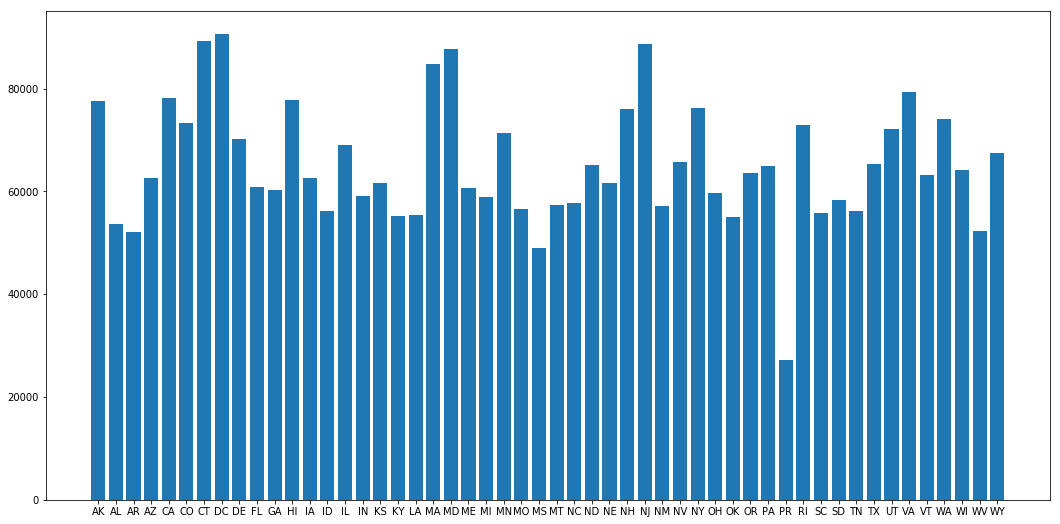

In [7]:

plt.figure(figsize=(18,9))
state_incomes = plt.bar(income_mean["State_ab"],income_mean["Mean"])


In [8]:
death_summary = death_data[["State", "Deaths"]]
death_sums = death_summary.groupby("State").sum().reset_index()
death_sums["State_abrev"] = ["AK","AL","AR","AZ","CA","CD","CT","DC","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]
death_sums.head()

,State,Deaths,State_abrev
0,Alabama,50519,AK
1,Alaska,3259,AL
2,Arizona,54759,AR
3,Arkansas,30031,AZ
4,California,263979,CA


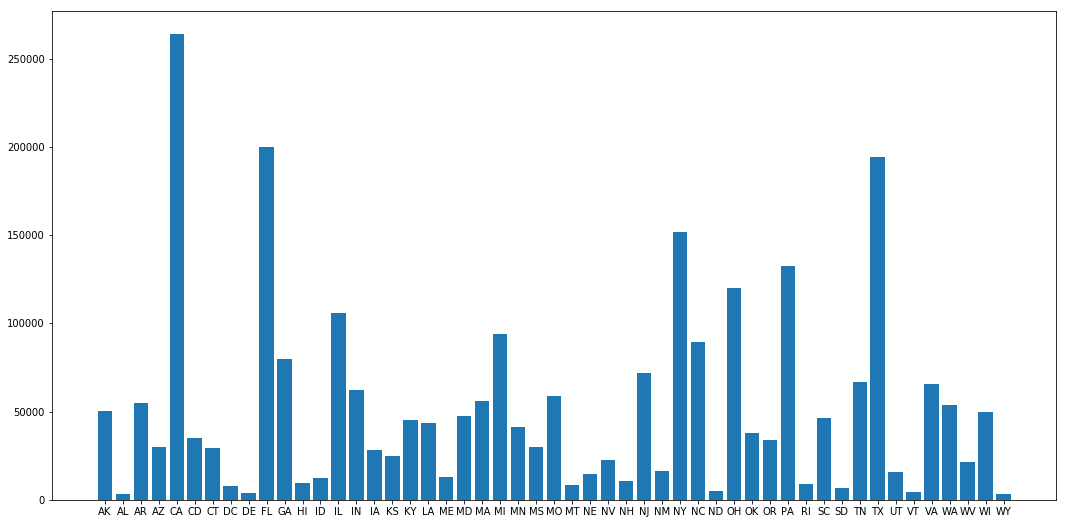

In [9]:
plt.figure(figsize=(18,9))
death_graph = plt.bar(death_sums["State_abrev"],death_sums["Deaths"])

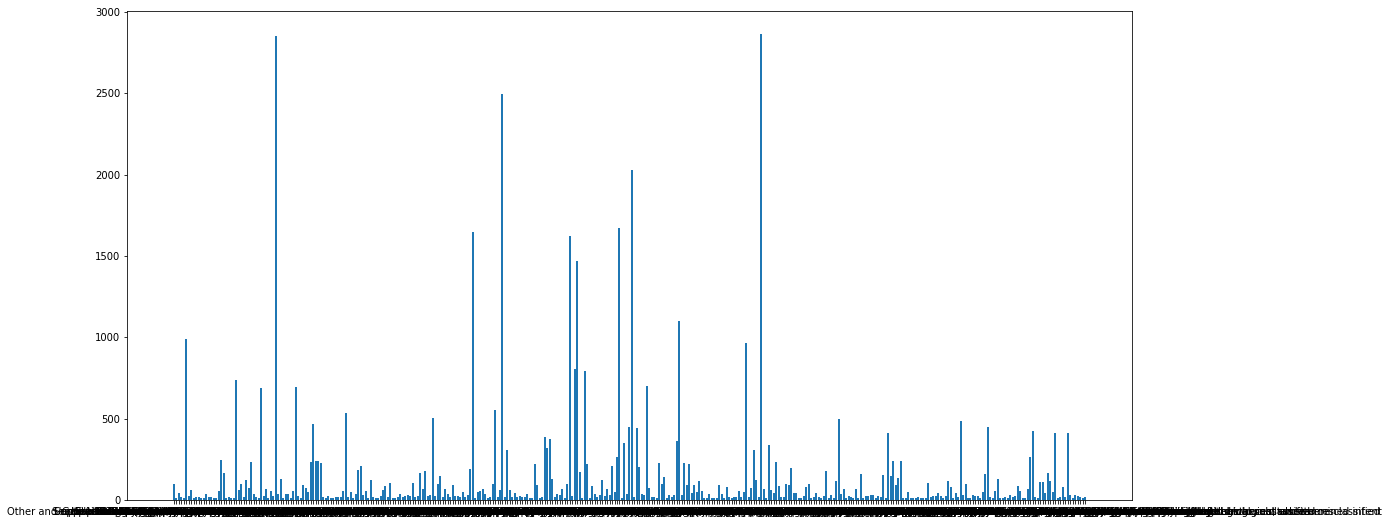

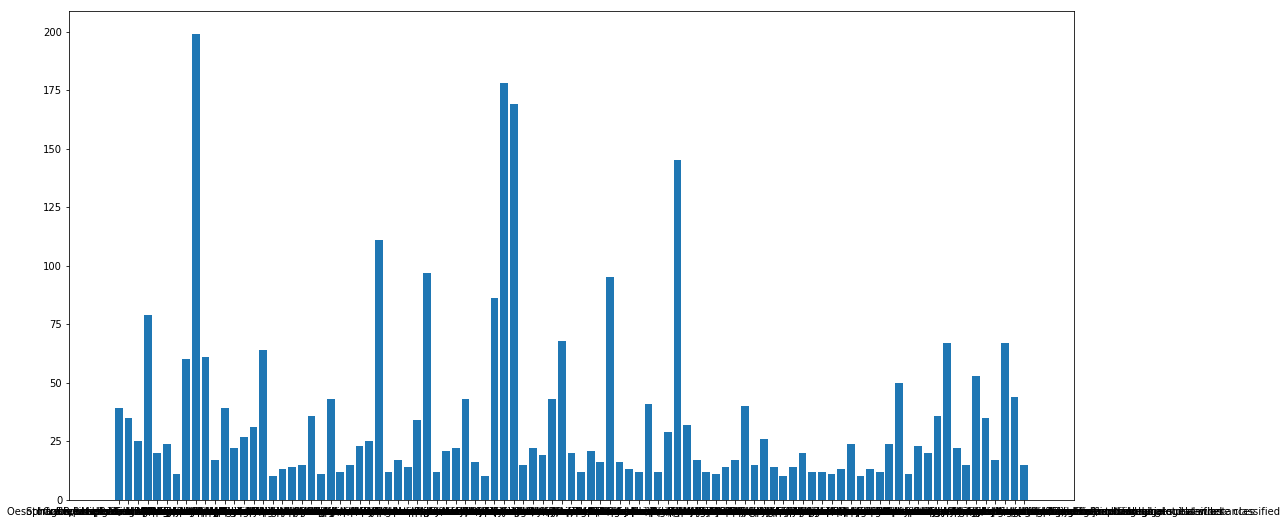

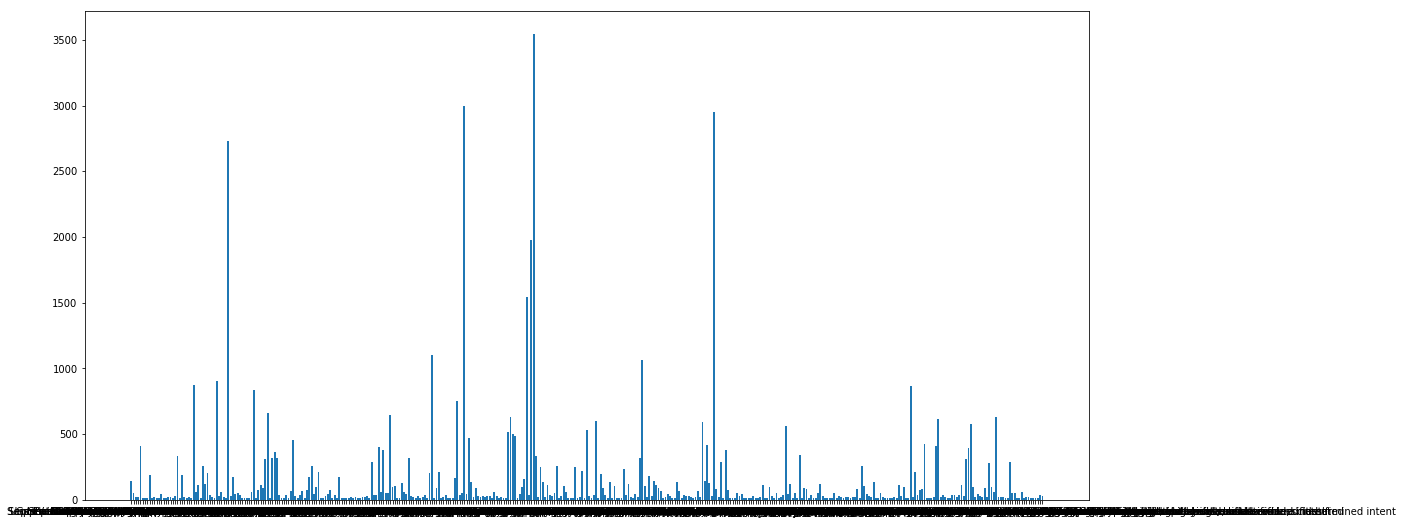

Error in callback <function flush_figures at 0x1193112f0> (for post_execute):


KeyboardInterrupt: 

In [12]:
states = death_df["State"].unique()
#fig, axes = plt.subplots(2,2)
matplotlib.use("agg")
for counter,state in enumerate(states[0:5]):
    current_state = death_df[death_df["State"]== state]
    plt.figure(figsize=(18,9))
    graph = plt.bar(current_state["Cause of death"],current_state["Deaths"])
    plt.savefig(f"{state}.png")